In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
def create_gaussian_kernel(k_size, sigma):
    # Create a coordinate grid (centered at 0)
    center = k_size // 2
    x, y = np.meshgrid(np.arange(-center, center + 1), 
                       np.arange(-center, center + 1))
    # Apply Gaussian Formula
    exponent = -(x**2 + y**2) / (2 * sigma**2)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(exponent)
    # Normalize the kernel so sum = 1
    return kernel / np.sum(kernel)

Kernel Shape: (5, 5)
Kernel Sum: 1.0000


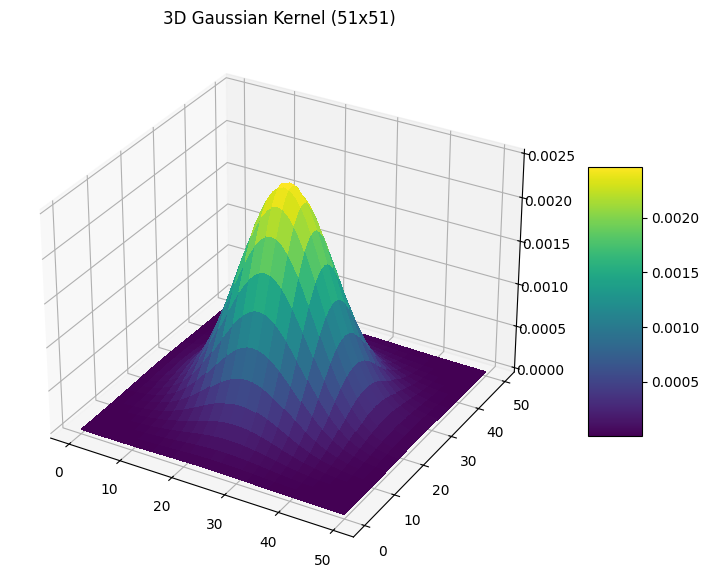

In [6]:
# Define parameters
sigma = 2
k_size = 5 
# Generate the kernel
manual_kernel = create_gaussian_kernel(k_size, sigma)
print(f"Kernel Shape: {manual_kernel.shape}")
print(f"Kernel Sum: {np.sum(manual_kernel):.4f}") # Should be approx 1.0
# PART B: Visualize as 3D Surface Plot 
viz_size = 51
viz_sigma = 8
viz_kernel = create_gaussian_kernel(viz_size, viz_sigma)

# Create grid for plotting
X, Y = np.meshgrid(np.arange(viz_size), np.arange(viz_size))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, viz_kernel, cmap='viridis', linewidth=0, antialiased=False)
ax.set_title(f'3D Gaussian Kernel ({viz_size}x{viz_size})')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Max difference between Manual and OpenCV: 1


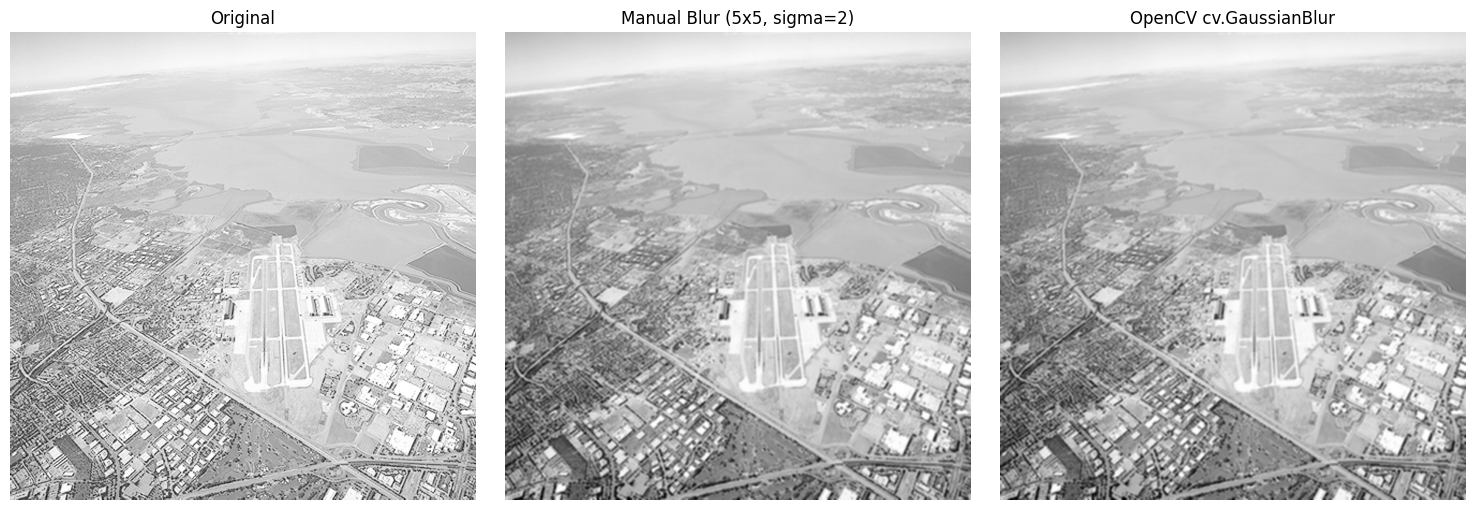

Images saved.


In [10]:
import os

img_path = '../images/runway.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Load image first.")
else:
    # Apply Manual Kernel
    img_manual_blur = cv2.filter2D(img, -1, manual_kernel)
    
    # Apply OpenCV Built-in Gaussian Blur
    img_cv_blur = cv2.GaussianBlur(img, (k_size, k_size), sigmaX=sigma)
    
    # Calculate Difference (Absolute difference)
    diff = cv2.absdiff(img_manual_blur, img_cv_blur)
    print(f"Max difference between Manual and OpenCV: {np.max(diff)}")

    # Plotting Results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img_manual_blur, cmap='gray')
    plt.title(f'Manual Blur (5x5, sigma={sigma})')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img_cv_blur, cmap='gray')
    plt.title('OpenCV cv.GaussianBlur')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    output_dir = '../images/outputs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    cv2.imwrite(os.path.join(output_dir, 'q5_Manual_Blur.jpg'), img_manual_blur)
    cv2.imwrite(os.path.join(output_dir, 'q5_OpenCV_cv-GaussianBlur.jpg'), img_cv_blur)
    cv2.imwrite(os.path.join(output_dir, 'q5_Difference.jpg'), diff)
    print("Images saved.")